<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Creating-the-environment" data-toc-modified-id="Creating-the-environment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Creating the environment</a></span><ul class="toc-item"><li><span><a href="#Installing-libraries" data-toc-modified-id="Installing-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Installing libraries</a></span></li><li><span><a href="#Importing-modules" data-toc-modified-id="Importing-modules-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importing modules</a></span></li><li><span><a href="#Checking-system-and-setting-it-up" data-toc-modified-id="Checking-system-and-setting-it-up-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Checking system and setting it up</a></span></li></ul></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data exploration</a></span><ul class="toc-item"><li><span><a href="#ABOUT-THE-DATASET" data-toc-modified-id="ABOUT-THE-DATASET-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>ABOUT THE DATASET</a></span></li><li><span><a href="#Question-1---Loading" data-toc-modified-id="Question-1---Loading-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Question 1 - Loading</a></span></li><li><span><a href="#Question-2---Analyzing" data-toc-modified-id="Question-2---Analyzing-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Question 2 - Analyzing</a></span></li><li><span><a href="#Data-exploration-shortcut" data-toc-modified-id="Data-exploration-shortcut-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Data exploration shortcut</a></span></li><li><span><a href="#Question-3---Exploring" data-toc-modified-id="Question-3---Exploring-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Question 3 - Exploring</a></span></li><li><span><a href="#Exploring-independent-variables" data-toc-modified-id="Exploring-independent-variables-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Exploring independent variables</a></span></li></ul></li><li><span><a href="#Data-Manipulation" data-toc-modified-id="Data-Manipulation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Manipulation</a></span><ul class="toc-item"><li><span><a href="#Question-4---Manipulating" data-toc-modified-id="Question-4---Manipulating-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Question 4 - Manipulating</a></span></li></ul></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plotting</a></span><ul class="toc-item"><li><span><a href="#Question-5---Plotting" data-toc-modified-id="Question-5---Plotting-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Question 5 - Plotting</a></span></li></ul></li><li><span><a href="#Journey" data-toc-modified-id="Journey-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Journey</a></span><ul class="toc-item"><li><span><a href="#Question-6---Wrangling" data-toc-modified-id="Question-6---Wrangling-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Question 6 - Wrangling</a></span></li></ul></li><li><span><a href="#Correlation-Plot" data-toc-modified-id="Correlation-Plot-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlation Plot</a></span><ul class="toc-item"><li><span><a href="#Question-7---Correlating" data-toc-modified-id="Question-7---Correlating-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Question 7 - Correlating</a></span></li><li><span><a href="#Extra" data-toc-modified-id="Extra-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Extra</a></span></li></ul></li></ul></div>

# Creating the environment 

## Installing libraries

In [1]:
# Installing modules
# !pip install plotly

## Importing modules

In [2]:

# Importing libraries
print("Importing libraries ... ")
import pandas as pd
import numpy as np
import pixiedust
import datetime
import time
import seaborn as sns
from scipy import stats
from scipy.stats.distributions import norm
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
print("All modules are ready")




Importing libraries ... 
Pixiedust database opened successfully


All modules are ready


## Checking system and setting it up

In [3]:
# Setting up the system

def settings():
    # Display python version and operational system-specif parameters 
    import sys
    print("Python version: ", sys.version, "\n")

    # Check the number of cores and memory usage
    import multiprocessing as mp
    num_cores = mp.cpu_count()
    import psutil
    print("This kernel has ", num_cores, "cores and memory usage of:", psutil.virtual_memory(), "\n")

    # # Check Dask and Hosting the diagnostics dashboard
    # cluster = LocalCluster()
    # client = Client(cluster)
    # client

    # Expands the visualization of a matrix
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.width', 500)
    
    #Checking the directory we are working on
    import os
    print("File directory", os.getcwd())

settings()

Python version:  3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)] 

This kernel has  4 cores and memory usage of: svmem(total=8589934592, available=3977957376, percent=53.7, used=3262722048, free=1737482240, active=1588899840, inactive=1765523456, wired=1673822208) 

File directory /Users/speedy/Desktop/UofT/Course load/INF2179H - Machine Learning/Assignments


# Data exploration

## ABOUT THE DATASET 

* Time: Timestamp in UNIX time (seconds elapsed since January 1st, 1970).
* LineID: Line identifier (e.g., Line number 65).
* JourneyPattern: A line may have several routes (including forward and backward directions). This field identifies a specific sequence of stops that the bus takes.
* VehicleJourneyID: A unique identifier for the journey (every time a vehicle restarts a journey from a terminal station, this id resets).
* Operator: Dublin works with several bus operating forms. The field contains the form that performs the journey.
* Congestion: An indicator for whether the bus is currently in traffic.
* Lon, Lat: GPS location.
* Delay: The delay of the bus w.r.t. schedule.
* VehicleID: A unique bus id (a bus may change patterns but not its id).
* StopID: The closest stop (identifier).
* AtStop: An indicator for an open door.

## Question 1 - Loading
Load the data into a data structure (e.g., pandas, or numpy array/matrix)

In [4]:
# reading dataset
file_path = "/Users/speedy/Desktop/UofT/Course load/INF2179H - Machine Learning/Notebooks/Data/"
siri = pd.read_csv(file_path + "SiriLog.csv")

# printing the first two lines on the dataset
siri.head(2)

,Time,LineID,JourneyPattern,VehicleJID,Operator,Congestion,Lon,Lat,Delay,VehicleID,StopID,AtStop
0,1411686000,65B,065B1001,7251,RD,0,-6.266066,53.338269,-739,38004,1354,0
1,1411686000,13,00131002,1809,HN,0,-6.266332,53.408386,1127,33342,323,0


In [5]:
# Exploration 1st step
def exploration():
    # Dataset type
    print("Dataset type is: ", type(siri), "\n")
    
    # Data shape
    print("The data shape is: ", siri.shape, "\n")
    
    # Checking for duplicates
    dup = siri.duplicated().sum()
    print("This dataset has ", dup, "duplicated values\n")
    
    # Column names
    print("Column names are: ", siri.columns)
    

exploration()

Dataset type is:  <class 'pandas.core.frame.DataFrame'> 

The data shape is:  (1048575, 12) 

This dataset has  0 duplicated values

Column names are:  Index(['Time', 'LineID', 'JourneyPattern', 'VehicleJID', 'Operator', 'Congestion', 'Lon', 'Lat', 'Delay', 'VehicleID', 'StopID', 'AtStop'], dtype='object')


In [6]:
# Checking null values
siri.isnull().sum()

Time              0
LineID            0
JourneyPattern    0
VehicleJID        0
Operator          0
Congestion        0
Lon               0
Lat               0
Delay             0
VehicleID         0
StopID            0
AtStop            0
dtype: int64

## Question 2 - Analyzing 
Which of the predictors are numeric and which are nominal (or categorical)


In [7]:
siri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Time            1048575 non-null  int64  
 1   LineID          1048575 non-null  object 
 2   JourneyPattern  1048575 non-null  object 
 3   VehicleJID      1048575 non-null  int64  
 4   Operator        1048575 non-null  object 
 5   Congestion      1048575 non-null  int64  
 6   Lon             1048575 non-null  float64
 7   Lat             1048575 non-null  float64
 8   Delay           1048575 non-null  int64  
 9   VehicleID       1048575 non-null  int64  
 10  StopID          1048575 non-null  int64  
 11  AtStop          1048575 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 96.0+ MB


## Data exploration shortcut

## Question 3 - Exploring
What is the range of each numeric attribute? What is the mean and standard deviation of each numeric predictor?


In [8]:
obj = siri["LineID"].dtype
for j in siri:
    # Passing by categorical variables
    if siri[j].dtype == obj:
        siri = siri
    # Getting data type and range
    else:
        min_val = siri[j].min()
        max_val = siri[j].max()
        print(j, " is a datatype ", siri[j].dtype, " and ranges from ", min_val, " to ", max_val) 


Time  is a datatype  int64  and ranges from  1411686000  to  1411755520
VehicleJID  is a datatype  int64  and ranges from  1  to  996944
Congestion  is a datatype  int64  and ranges from  0  to  1
Lon  is a datatype  float64  and ranges from  -6.614652  to  -6.053133
Lat  is a datatype  float64  and ranges from  53.070417000000006  to  53.606517000000004
Delay  is a datatype  int64  and ranges from  -14209  to  11723
VehicleID  is a datatype  int64  and ranges from  18001  to  44034
StopID  is a datatype  int64  and ranges from  0  to  7572
AtStop  is a datatype  int64  and ranges from  0  to  1


In [9]:
# Printing summary statistics of numerical variables
siri.describe()

,Time,VehicleJID,Congestion,Lon,Lat,Delay,VehicleID,StopID,AtStop
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.411733e+09,9.977111e+03,6.713874e-03,-6.270000e+00,5.334311e+01,1.513641e+02,3.659187e+04,2.472550e+03,2.197182e-01
std,1.397623e+04,7.739258e+04,8.166274e-02,7.979334e-02,5.285900e-02,6.200250e+02,4.065003e+03,2.065485e+03,4.140559e-01
min,1.411686e+09,1.000000e+00,0.000000e+00,-6.614652e+00,5.307042e+01,-1.420900e+04,1.800100e+04,0.000000e+00,0.000000e+00
25%,1.411720e+09,1.994000e+03,0.000000e+00,-6.304491e+00,5.332053e+01,-5.900000e+01,3.339600e+04,7.900000e+02,0.000000e+00
50%,1.411733e+09,3.687000e+03,0.000000e+00,-6.261588e+00,5.334552e+01,6.400000e+01,3.361600e+04,1.934000e+03,0.000000e+00
75%,1.411745e+09,5.304000e+03,0.000000e+00,-6.233367e+00,5.336943e+01,2.950000e+02,4.002000e+04,3.905000e+03,0.000000e+00
max,1.411756e+09,9.969440e+05,1.000000e+00,-6.053133e+00,5.360652e+01,1.172300e+04,4.403400e+04,7.572000e+03,1.000000e+00


## Exploring independent variables

In [10]:
siri.Operator.unique()

array(['RD', 'HN', 'D1', 'CD', 'PO', 'SL', 'CF', 'D2'], dtype=object)

In [11]:
# Checking unique Operator and how many times they appear in the dataset
siri["Operator"].value_counts()

HN    187732
PO    185149
D1    138919
RD    128832
SL    118097
CD    108482
D2     99400
CF     81964
Name: Operator, dtype: int64

# Data Manipulation

## Question 4 - Manipulating
Remove rows 1000 through 8500. What is the range, mean, standard deviation of each numeric feature in the remaining dataset? Choose one of the operators. Present the mean delay for that operator.


In [12]:
siri_subsample = siri.drop(siri.index[999:8500])
siri_subsample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041074 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Time            1041074 non-null  int64  
 1   LineID          1041074 non-null  object 
 2   JourneyPattern  1041074 non-null  object 
 3   VehicleJID      1041074 non-null  int64  
 4   Operator        1041074 non-null  object 
 5   Congestion      1041074 non-null  int64  
 6   Lon             1041074 non-null  float64
 7   Lat             1041074 non-null  float64
 8   Delay           1041074 non-null  int64  
 9   VehicleID       1041074 non-null  int64  
 10  StopID          1041074 non-null  int64  
 11  AtStop          1041074 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 103.3+ MB


In [13]:
siri_subsample.describe()

,Time,VehicleJID,Congestion,Lon,Lat,Delay,VehicleID,StopID,AtStop
count,1.041074e+06,1.041074e+06,1.041074e+06,1.041074e+06,1.041074e+06,1.041074e+06,1.041074e+06,1.041074e+06,1.041074e+06
mean,1.411733e+09,9.943590e+03,6.762247e-03,-6.269921e+00,5.334317e+01,1.526865e+02,3.658357e+04,2.466148e+03,2.193600e-01
std,1.368251e+04,7.719045e+04,8.195441e-02,7.956155e-02,5.267330e-02,6.214491e+02,4.064981e+03,2.063096e+03,4.138132e-01
min,1.411686e+09,1.000000e+00,0.000000e+00,-6.614652e+00,5.307042e+01,-1.420900e+04,1.800100e+04,0.000000e+00,0.000000e+00
25%,1.411720e+09,1.994000e+03,0.000000e+00,-6.304279e+00,5.332064e+01,-5.800000e+01,3.339500e+04,7.900000e+02,0.000000e+00
50%,1.411733e+09,3.686000e+03,0.000000e+00,-6.261579e+00,5.334552e+01,6.500000e+01,3.361500e+04,1.934000e+03,0.000000e+00
75%,1.411745e+09,5.301000e+03,0.000000e+00,-6.233417e+00,5.336941e+01,2.970000e+02,4.002000e+04,3.886000e+03,0.000000e+00
max,1.411756e+09,9.969440e+05,1.000000e+00,-6.053133e+00,5.360652e+01,1.172300e+04,4.403400e+04,7.572000e+03,1.000000e+00


In [14]:
hn_operator = siri_subsample[siri_subsample["Operator"] == "HN"]
print("The mean Delay for the Operator HN is: ", hn_operator["Delay"].mean())

The mean Delay for the Operator HN is:  121.56836137038324


# Plotting

## Question 5 - Plotting
Plot the delay distribution per operator. You should have K histograms with K being the number of operators. What can we learn from this graph?


In [15]:
delay_dist = siri_subsample[["Operator", "Delay"]]
print("Unique Operators: ", delay_dist.Operator.unique())

Unique Operators:  ['RD' 'HN' 'D1' 'CD' 'PO' 'SL' 'CF' 'D2']


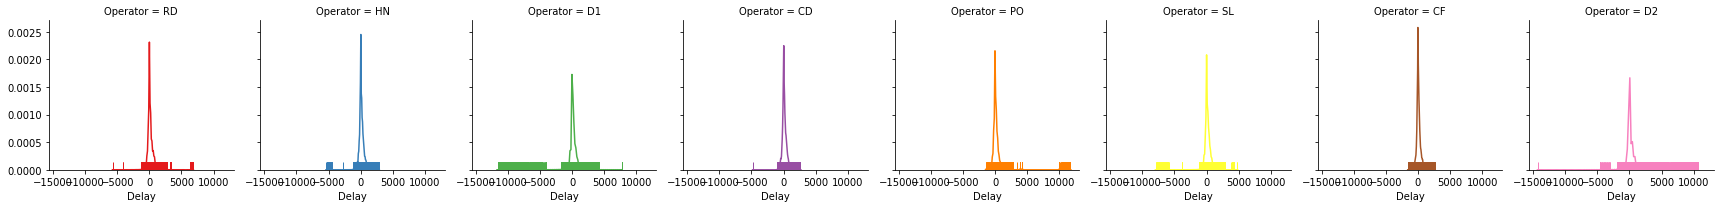

In [16]:
# Density   
g = sns.FacetGrid(data=delay_dist, col = "Operator", hue="Operator", palette="Set1")
g = (g.map(sns.distplot, "Delay", hist=False, rug=True))


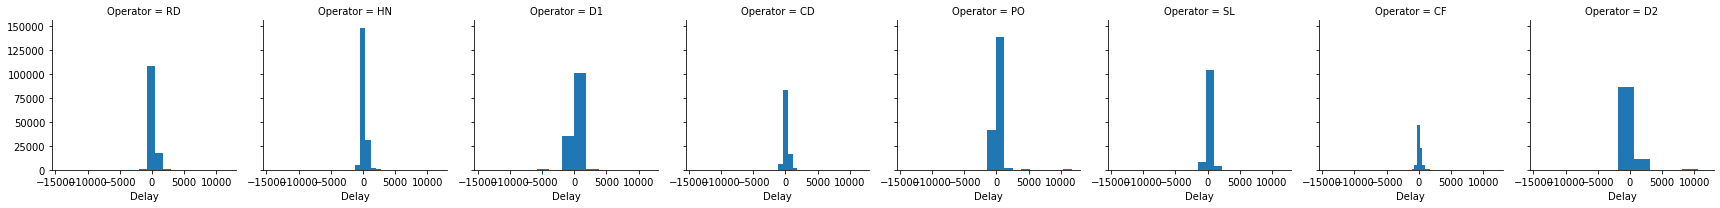

In [17]:
h = sns.FacetGrid(delay_dist, col="Operator")
h.map(plt.hist, "Delay");

From the histograms above we can see the non-linear relationship between Operators and Delay values that can be interpreted as an extrinsic phenomenon, not forcefully caused. Possible causes might be rush hour, accidents, etc. 
It is also noticeable that CF Operator has a small number of delay occurrences but a high duration (length). D1 and D2 have a small length of individual delay episodes when compared to CF and HN that hold major lengths.
However, if we do not consider isolated cases nor outliers we have a different understanding according to the magnitude density as shown in the scatter plot below where HN, CD, and D1 present average delays' length greater than the rest of the Operators. Moreover, RD holds a constant volume of medium to small delays and CF presenting the smaller overall delay occurrences.

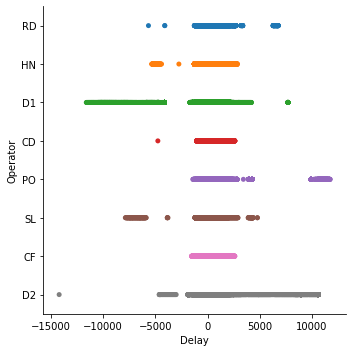

In [18]:
sns.catplot(x="Delay", y="Operator", jitter=False, data=delay_dist);

# Journey

## Question 6 - Wrangling 
We aim at predicting journey durations based on various trip characteristics. Create a dataset, where every row is a single journey, while the columns summarize all relevant journey information that would be useful to predict traveling times. Make sure that one of the columns is the total journey time.


In [28]:
print(siri_subsample.AtStop.unique())
print(siri_subsample.Congestion.unique())

[0 1]
[0 1]


The variable values above can be read this way:

- Congestion = 1 when the vehicle is running, Congestion = 0 when the vehicle is stopped
- AtStop = 1 when the vehicle has an open door (stopped), AtStop = 0 when the vehicle doors are closed (running)
    
As these two variables are considered duplicates / redundant and our algorithm is not running real-time, I choose to delete both from our dataset what also makes the model faster (less computational expensive).

However, I decided to keep "Operator" and "LineID" for future database documentation, in case one of the operators and/or LineID changes.

In [20]:
siri_journey = siri_subsample.groupby("VehicleJID").agg(journey_pattern = pd.NamedAgg(
    column="JourneyPattern", aggfunc=np.unique), mean_delay = pd.NamedAgg(
    column="Delay", aggfunc=np.mean), max_time = pd.NamedAgg(
    column="Time", aggfunc="max"), min_time = pd.NamedAgg(column="Time", aggfunc="min"),
    operator = pd.NamedAgg(column="Operator", aggfunc=np.unique),
    line = pd.NamedAgg(column="LineID", aggfunc=np.unique))
siri_journey["total_journey_time"] = siri_journey["max_time"] - siri_journey["min_time"]
siri_journey.head(2)


,journey_pattern,mean_delay,max_time,min_time,operator,line,total_journey_time
VehicleJID,,,,,,,
1,033A1002,460.085890,1411747735,1411744132,SL,33A,3603
2,033A0001,1121.917722,1411751274,1411747850,SL,33A,3424


In [21]:
# Checking for Null values and outliers after manipulation 
siri_journey.isnull().sum()

journey_pattern       0
mean_delay            0
max_time              0
min_time              0
operator              0
line                  0
total_journey_time    0
dtype: int64

In [22]:
# Double checking data type, size, etc.
siri_journey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5961 entries, 1 to 996944
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   journey_pattern     5961 non-null   object 
 1   mean_delay          5961 non-null   float64
 2   max_time            5961 non-null   int64  
 3   min_time            5961 non-null   int64  
 4   operator            5961 non-null   object 
 5   line                5961 non-null   object 
 6   total_journey_time  5961 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 372.6+ KB


# Correlation Plot

Obs.: I am not aiming to answer Question 7 with the next plot. The answer will come further down.


This heat map is based on the whole dataset and Colors are as follows:
    * Dark Red: Positive correlation,
    * Dark Blue: Negative correlation.

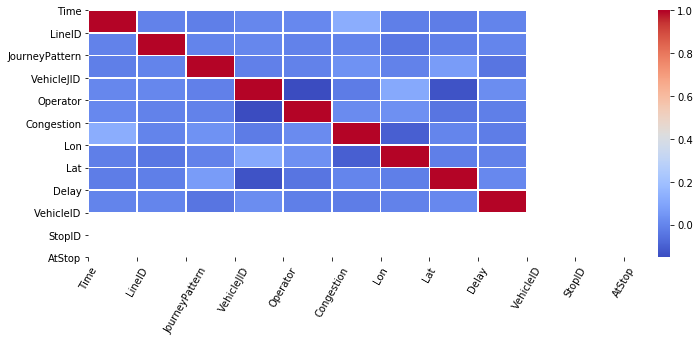

In [23]:
dtset = siri
correlation = siri.corr() # data correlation 
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(212)
sns.heatmap(correlation, ax=ax, cmap="coolwarm", linewidths = 0.5)
# fig.colorbar(cax)
ticks = np.arange(0,len(siri.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=60)
ax.set_yticks(ticks)
ax.set_xticklabels(siri.columns)
ax.set_yticklabels(siri.columns)
plt.show()

## Question 7 - Correlating
Plot the traveling time as function of at least 2 journey level features (e.g., average delay) to test correlation of those features with travel times. What are your main findings?

From the earlier plot, we could see that there is ...
- A strong negative correlation between:
    - VehicleJID, Operator, and Latitude, followed by Congestion;
    - Operator and VehicleJID
    
    
- A mild correlation between:
    - JourneyPattern and all variables except Congestion and Latitude; 
    - Longitude and Congestion
    
    
- A weak correlation between:
    - Time and Congestion; 
    - Longitude and VehicleJID
    
    
- No Positive correlation is presented in the original dataset.

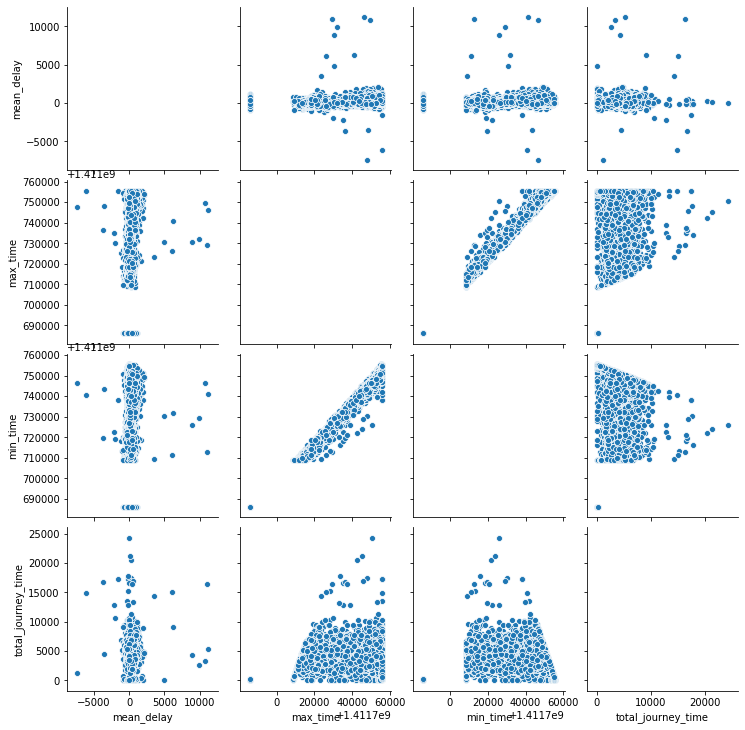

In [24]:
g = sns.pairplot(siri_journey, diag_kind="reg")

From the graphs above we state that there is no linear correlation between total journey time and average delay. Values are scattered with consistent outliers among studied variables. As expected, there is a positive linear relationship between the minimum and maximum journey time, so it does not reveal much.

The next graph is a grouped pixiedust bar chart, using MatPlotLib library as a renderer, aggregation by average values, clustered by LineID, and the image runs on the X-axis, it needs to roll the graph to the right to see the whole chart. It shows that in every journey pattern there is an average of 10 percent of delay in comparison to the total journey time. As the total Journey Time has values below 10,000 and the Average Delay values are below 1,000. Still, there is no linear relationship between these variables.


In [25]:
display(siri_journey)

## Extra
Converting time variable from unix seconds since epoch to datetime

In [26]:
# Iterate over Time column and convert seconds to datetime since epoch (JAN/01/1970)
siri.Time = [time.strftime('%Y-%m-%d %H:%M%:%S',time.gmtime(x)) for x in siri["Time"]]
siri.head()

,Time,LineID,JourneyPattern,VehicleJID,Operator,Congestion,Lon,Lat,Delay,VehicleID,StopID,AtStop
0,2014-09-25 23:00:00,65B,065B1001,7251,RD,0,-6.266066,53.338269,-739,38004,1354,0
1,2014-09-25 23:00:00,13,00131002,1809,HN,0,-6.266332,53.408386,1127,33342,323,0
2,2014-09-25 23:00:00,7,00070004,4235,D1,0,-6.130316,53.254202,-420,44016,3219,0
3,2014-09-25 23:00:00,25,025B0001,5757,CD,0,-6.446961,53.344495,143,33608,3370,0
4,2014-09-25 23:00:01,27,077A0001,2602,RD,0,-6.341833,53.289558,45,33520,2596,0


In [27]:
print("Time is a datatype ", siri.Time.dtype, " and ranges from ", min(siri.Time), " to ", max(siri.Time)) 

Time is a datatype  object  and ranges from  2014-09-25 23:00:00  to  2014-09-26 18:18:40
